In [13]:
import os
import numpy as np
from tomography_radon import get_rmse, plot_fbp_reconstruction, get_system
from skimage.filters import threshold_mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Shepp-Logan

In [11]:
search_path = 'ResultsInteger/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
rms = np.zeros((1, 8, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = os.listdir(search_path + f)
    sizes.sort(key=int)
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            rmse_qa = get_rmse(recon_qa, image)
            rmse_fbp = get_rmse(recon_fbp, image)
            rmse_sart = get_rmse(recon_sart, image)
            rmse_pi = get_rmse(recon_pi, image)
            rms[i, j, 0] = rmse_fbp
            rms[i, j, 1] = rmse_sart
            rms[i, j, 2] = rmse_pi
            rms[i, j, 3] = rmse_qa

['shepp-logan']


## Plot images

In [29]:
search_path = 'ResultsInteger/'
images = os.listdir("ResultsInteger/")
rms = np.zeros((1, 8, 3))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = os.listdir(search_path + f)
    sizes.sort(key=int)
    columns = 5
    print(columns)
    rows = len(sizes)
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16))
    for s, j in zip(sizes, range(len(sizes))):
        res = [x for x in os.listdir(search_path + f + '/' + s) if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + f + '/' + s + '/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 1].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 2].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 3].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 4].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 4].set_xticks([]) 
            ax[j, 4].set_yticks([])
    cols = ["Original", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)
    # rows = ["4 x 4 px", "8 x 8 px", "12 x 12 px", "16 x 16 px", "20 x20 px", "24 x 24 px", "28 x 28 px", "32 x 32 px"]
    rows = ["4", "8", "12", "16", "20", "24", "28", "32"]
    for axe, row in zip(ax[:,0], rows):
        axe.set_ylabel(row, rotation=0, size=40)
        axe.yaxis.set_label_coords(-.5, 0.3)
    fig.tight_layout()
    print(f)
    plt.savefig(search_path + f + ".png")
            

['shepp-logan']
5
shepp-logan


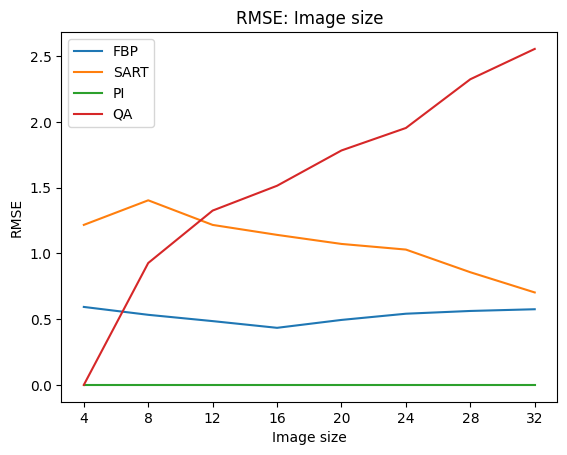

In [8]:
import matplotlib.pyplot as plt
mat_sizes = [4, 8, 12, 16, 20, 24, 28, 32]
plt.plot(rms[0, :, 0], label="FBP")
plt.plot(rms[0, :, 1], label="SART")
plt.plot(rms[0, :, 2], label="PI")
plt.plot(rms[0, :, 3], label="QA")
plt.xticks(range(8), mat_sizes)
plt.xlabel("Image size")
plt.ylabel("RMSE")
plt.title("RMSE: Image size")
plt.legend()
plt.savefig("ResultsInteger/shepp_logan_rmse.png")
plt.show()

## Digits: Plot

In [37]:
search_path = 'ResultsDigits/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(images)
images = ['553', '577', '654', '714', '939', '956', '97', '98']
columns = 5
rows = len(images)
fig, ax = plt.subplots(rows, columns, figsize=(16, 16))
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        ax[i, 0].imshow(image, cmap='gray')
        # ax[j, 0].axis("off")
        ax[i, 0].set_xticks([])
        ax[i, 0].set_yticks([])  
        # fig.add_subplot(rows, columns, j*columns + 2)
        ax[i, 1].imshow(recon_fbp, cmap='gray')
        #ax[j, 1].axis("off")
        ax[i, 1].set_xticks([])
        ax[i, 1].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 3)
        ax[i, 2].imshow(recon_sart, cmap='gray')
        # ax[j, 2].axis("off")
        ax[i, 2].set_xticks([])
        ax[i, 2].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 4)
        ax[i, 3].imshow(recon_pi, cmap='gray')
        #ax[j, 3].axis("off")
        ax[i, 3].set_xticks([])
        ax[i, 3].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 5)
        ax[i, 4].imshow(recon_qa, cmap='gray')
        #ax[j, 4].axis("off")
        ax[i, 4].set_xticks([]) 
        ax[i, 4].set_yticks([])
cols = ["Original", "FBP", "SART", "PI", "QA"]
for axe, col in zip(ax[0], cols):
    axe.set_title(col, size=40)
fig.tight_layout()
plt.savefig(search_path + f + ".png")

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


## Calc RMSE

In [11]:
search_path = 'ResultsDigits/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
rms = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms[i, 0] = rmse_fbp
        rms[i, 1] = rmse_sart
        rms[i, 2] = rmse_pi
        rms[i, 3] = rmse_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


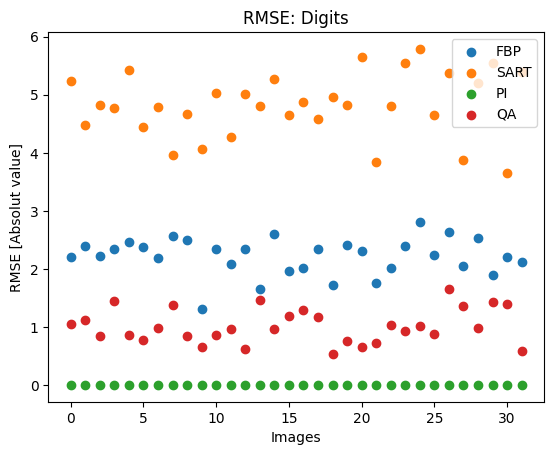

In [12]:
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, rms[:, 0], label="FBP")
plt.scatter(x, rms[:, 1], label="SART")
plt.scatter(x, rms[:, 2], label="PI")
plt.scatter(x, rms[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits")
plt.legend(loc="upper right")
plt.savefig("ResultsDigits/digits_rmse.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rms[:, 0])
plt.plot(rms[:, 1])
plt.plot(rms[:, 2])
plt.show()

## Digits w/ noise

In [44]:
search_path = 'ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(images)
images = ['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301']
columns = 5
rows = len(images)
fig, ax = plt.subplots(rows, columns, figsize=(16, 16))
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        ax[i, 0].imshow(image, cmap='gray')
        # ax[j, 0].axis("off")
        ax[i, 0].set_xticks([])
        ax[i, 0].set_yticks([])  
        # fig.add_subplot(rows, columns, j*columns + 2)
        ax[i, 1].imshow(recon_fbp, cmap='gray')
        #ax[j, 1].axis("off")
        ax[i, 1].set_xticks([])
        ax[i, 1].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 3)
        ax[i, 2].imshow(recon_sart, cmap='gray')
        # ax[j, 2].axis("off")
        ax[i, 2].set_xticks([])
        ax[i, 2].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 4)
        ax[i, 3].imshow(recon_pi, cmap='gray')
        #ax[j, 3].axis("off")
        ax[i, 3].set_xticks([])
        ax[i, 3].set_yticks([])
        # fig.add_subplot(rows, columns, j*columns + 5)
        ax[i, 4].imshow(recon_qa, cmap='gray')
        #ax[j, 4].axis("off")
        ax[i, 4].set_xticks([]) 
        ax[i, 4].set_yticks([])
cols = ["Original", "FBP", "SART", "PI", "QA"]
for axe, col in zip(ax[0], cols):
    axe.set_title(col, size=40)
fig.tight_layout()
plt.savefig(search_path + f + ".png")

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


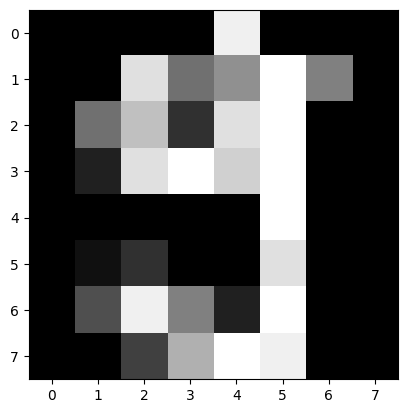

In [18]:
import matplotlib.pyplot as plt
search_path = 'ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
print(images)
images = ['553']
columns = 5
rows = len(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram'].reshape(image.shape)
        # plt.imshow(sinogram, cmap='gray')
        plt.imshow(image, cmap='gray')
        plt.show()

In [9]:
search_path = 'ResultsDigitsNoise/'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png")]
rms_noise = np.zeros((32, 4))
print(images)
for f, i in zip(images, range(len(images))):
    res = [x for x in os.listdir(search_path + f + '/') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + f + '/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms_noise[i, 0] = rmse_fbp
        rms_noise[i, 1] = rmse_sart
        rms_noise[i, 2] = rmse_pi
        rms_noise[i, 3] = rmse_qa

['1075', '1114', '1145', '1188', '1189', '1245', '1253', '1301', '1330', '1377', '1440', '147', '1475', '1499', '1533', '174', '1745', '1763', '19', '204', '271', '303', '357', '548', '553', '577', '654', '714', '939', '956', '97', '98']


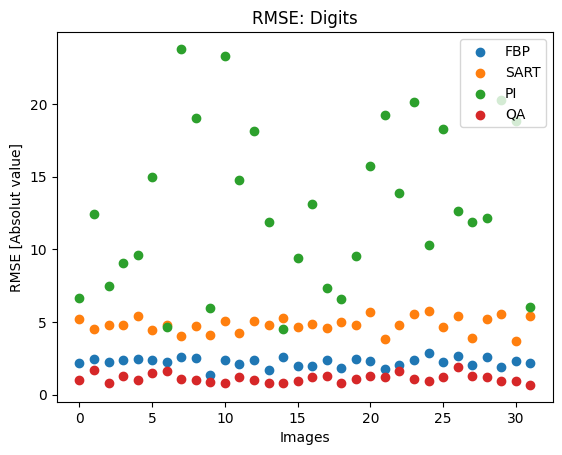

In [10]:
import matplotlib.pyplot as plt
x = np.arange(32)
plt.scatter(x, rms_noise[:, 0], label="FBP")
plt.scatter(x, rms_noise[:, 1], label="SART")
plt.scatter(x, rms_noise[:, 2], label="PI")
plt.scatter(x, rms_noise[:, 3], label="QA")
plt.xlabel("Images")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits")
plt.legend(loc="upper right")
plt.savefig("ResultsDigitsNoise/digits_noise_rmse.png")
plt.show()

(4,)
(4,)


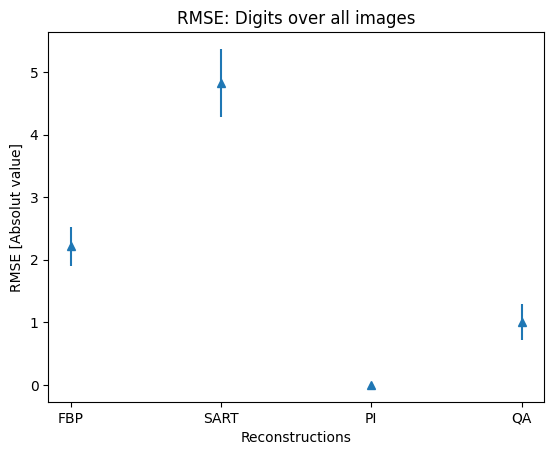

In [21]:
import matplotlib.pyplot as plt
rms_mean = np.sum(rms, axis=0)/32
rms_noise_mean = np.sum(rms_noise, axis=0)
print(rms_mean.shape)
print(rms_noise_mean.shape)

x = np.array([1, 2, 3, 4])
y = rms_mean
e = [np.std(rms[:, 0]), np.std(rms[:, 1]), np.std(rms[:, 2]), np.std(rms[:, 3])]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, ['FBP', 'SART', 'PI', 'QA'])
plt.xlabel("Reconstructions")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits over all images")
plt.savefig("ResultsDigitsNoise/digits_rmse_variance.png")
plt.show()

(4,)
(4,)


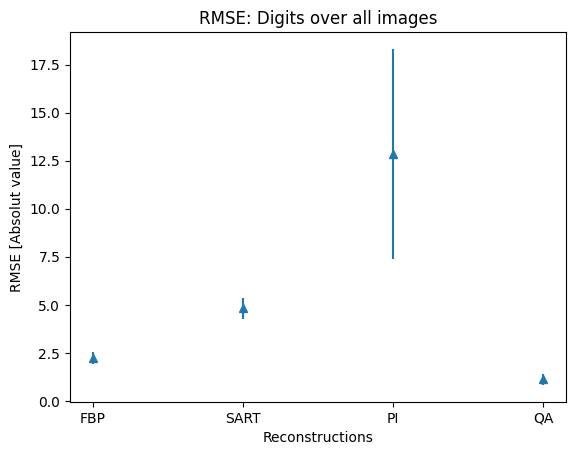

In [22]:
import matplotlib.pyplot as plt
rms_mean = np.sum(rms, axis=0)/32
rms_noise_mean = np.sum(rms_noise, axis=0)/32
print(rms_mean.shape)
print(rms_noise_mean.shape)

x = np.array([1, 2, 3, 4])
y = rms_noise_mean
e = [np.std(rms_noise[:, 0]), np.std(rms_noise[:, 1]), np.std(rms_noise[:, 2]), np.std(rms_noise[:, 3])]
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, ['FBP', 'SART', 'PI', 'QA'])
plt.xlabel("Reconstructions")
plt.ylabel("RMSE [Absolut value]")
plt.title("RMSE: Digits over all images")
plt.savefig("ResultsDigitsNoise/digits_noise_rmse_variance.png")
plt.show()